In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('ml_data_salary.csv')
df.head()

,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


In [3]:
X = df[["age","distance","YearsExperience"]]
y = df['Salary']

In [4]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size= 0.3, random_state=100 )

In [5]:
# We specify random seed so that the train and test data set always have the same rows, respectively
# np.random.seed(0)
# df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [6]:

# Dividing the training data set into X and Y
# y_train = df_train.pop('Salary')
# x_train = df_train

In [7]:
model = LinearRegression().fit(x_train, y_train)

In [8]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -1.814477032484281e+17
Coefficients:


[('age', 1.983169791706995e+16),
 ('distance', -5513376456848604.0),
 ('YearsExperience', -6048256774938708.0)]

In [9]:
model.predict([[31.1,77.75,1.1]])

array([35904.])

In [10]:
#Prediction of test set
y_pred_model= model.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_model))



Prediction for test set: [ 61280. 117696. 125312.  65088.  53408.  64128. 118688. 112768.  54368.]


In [11]:
#Actual value and the predicted value
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})

In [12]:
model_diff.head()

,Actual value,Predicted value
9,57189,61280.0
26,116969,117696.0
28,122391,125312.0
13,57081,65088.0
5,56642,53408.0


In [13]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_model)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_model)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_model))
print('R squared: {:.2f}'.format(model.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.50
Mean Absolute Error: 5019.111111111111
Mean Square Error: 30388891.777777776
Root Mean Square Error: 5512.612064872494


In [14]:
# how to plot multiple regression model?
# how to check efficacy of this model?

In [22]:
ft = x_train*model.coef_
ftt = ft['age']+ft['distance']+ft["YearsExperience"]+model.intercept_
ftt.shape

(21,)

In [21]:
y= model.predict(x_train)
y.shape

(21,)

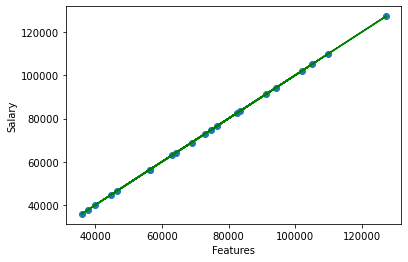

In [23]:
plt.scatter(ftt, y)
plt.plot(ftt, model.predict(x_train), color= 'Green')
plt.xlabel('Features')
plt.ylabel("Salary")
plt.show()